In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
%matplotlib inline
from sklearn.datasets import make_multilabel_classification
from sklearn import multioutput
from sklearn import ensemble
from sklearn import metrics

In [5]:
data='/content/Tray164.csv'

In [6]:
df = pd.read_csv(data)

In [7]:
df.shape

(7810, 193)

In [ ]:
df.head()

In [ ]:
column_name= df.columns
column_name

In [ ]:
df['AC133'].value_counts()


0    687
1    350
Name: AC133, dtype: int64

In [ ]:
df['AC133'].value_counts()/np.float(len(df))

<ipython-input-9-cda5c2e0e5b8>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df['AC133'].value_counts()/np.float(len(df))


0    0.662488
1    0.337512
Name: AC133, dtype: float64

In [ ]:
df['AC40'].value_counts()

0    594
1    443
Name: AC40, dtype: int64

In [ ]:
df['AC40'].value_counts()/np.float(len(df))

<ipython-input-11-2d447b54dd86>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df['AC40'].value_counts()/np.float(len(df))


0    0.572806
1    0.427194
Name: AC40, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Columns: 191 entries, Elbow_Left_X to AC144
dtypes: float64(46), int64(145)
memory usage: 1.5 MB


In [ ]:
#missing value
df.isnull().sum()

Elbow_Left_X         557
Elbow_Left_Y         557
Mouth_Back_Left_X    536
Mouth_Back_Left_Y    536
Head_Mid_Top_X       577
                    ... 
AC140                  0
AC141                  0
AC142                  0
AC143                  0
AC144                  0
Length: 191, dtype: int64

In [8]:
df.isnull().sum().sum()

179740

In [ ]:
#df2=df.fill(value=-1)

In [ ]:
for i in range(0,46):
  df[df.columns[i]]=df[df.columns[i]].interpolate(methods='linear',limit_direction='both')

df

,Elbow_Left_X,Elbow_Left_Y,Mouth_Back_Left_X,Mouth_Back_Left_Y,Head_Mid_Top_X,Head_Mid_Top_Y,Mouth_Back_Right_X,Mouth_Back_Right_Y,Knee_Left_X,Knee_Left_Y,...,AC135,AC136,AC137,AC138,AC139,AC140,AC141,AC142,AC143,AC144
0,448.280334,153.525436,49.499619,295.756287,557.099548,105.430542,495.872436,156.927261,552.346558,197.129211,...,0,0,0,0,0,0,0,0,0,0
1,448.280334,153.525436,49.499619,295.756287,557.099548,105.430542,495.872436,156.927261,552.168823,197.092895,...,0,0,0,0,0,0,0,0,0,0
2,448.280334,153.525436,49.499619,295.756287,557.099548,105.430542,495.872436,156.927261,548.264651,196.746459,...,0,0,0,0,0,0,0,0,0,0
3,448.280334,153.525436,49.499619,295.756287,557.099548,105.430542,495.872436,156.927261,544.360479,196.400022,...,0,0,0,0,0,0,0,0,0,0
4,448.280334,153.525436,49.499619,295.756287,557.099548,105.430542,495.872436,156.927261,540.456306,196.053585,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,532.055786,113.107910,121.176086,293.316833,356.537842,244.805481,313.436768,220.436752,253.028107,194.903404,...,0,0,0,0,0,0,0,0,0,0
1033,532.055786,113.107910,121.176086,293.316833,356.537842,244.805481,313.436768,220.436752,265.060608,184.269119,...,0,0,0,0,0,0,0,0,0,0
1034,532.055786,113.107910,121.176086,293.316833,356.537842,244.805481,313.436768,220.436752,265.060608,184.269119,...,0,0,0,0,0,0,0,0,0,0
1035,532.055786,113.107910,121.176086,293.316833,356.537842,244.805481,313.436768,220.436752,265.060608,184.269119,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df=df.fillna(value=-1)
##df2

In [10]:
df.shape

(7810, 193)

In [11]:
df.isnull().sum().sum()

0

In [ ]:
# view summary statistics in numerical variables
round(df.describe(),2)

,Elbow_Left_X,Elbow_Left_Y,Mouth_Back_Left_X,Mouth_Back_Left_Y,Head_Mid_Top_X,Head_Mid_Top_Y,Mouth_Back_Right_X,Mouth_Back_Right_Y,Knee_Left_X,Knee_Left_Y,...,AC135,AC136,AC137,AC138,AC139,AC140,AC141,AC142,AC143,AC144
count,1037.00,1037.00,1037.00,1037.00,1037.00,1037.00,1037.00,1037.00,1037.00,1037.00,...,1037.0,1037.0,1037.0,1037.0,1037.0,1037.0,1037.0,1037.0,1037.0,1037.0
mean,424.01,206.81,245.57,248.72,326.47,220.13,367.68,171.83,330.06,199.80,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,125.03,61.40,162.27,61.68,96.86,76.84,95.22,76.19,141.98,89.45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.15,64.35,20.13,-12.22,79.93,0.69,163.89,25.32,59.76,32.47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,365.62,153.53,49.50,216.25,264.74,172.39,299.13,132.30,217.13,131.45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,448.28,232.15,244.83,259.25,328.08,232.35,336.43,164.97,343.15,192.13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,532.06,254.32,416.18,295.76,376.50,268.53,460.66,220.44,460.62,285.12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,560.46,332.53,559.97,347.78,636.75,344.64,636.54,357.43,576.99,375.78,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


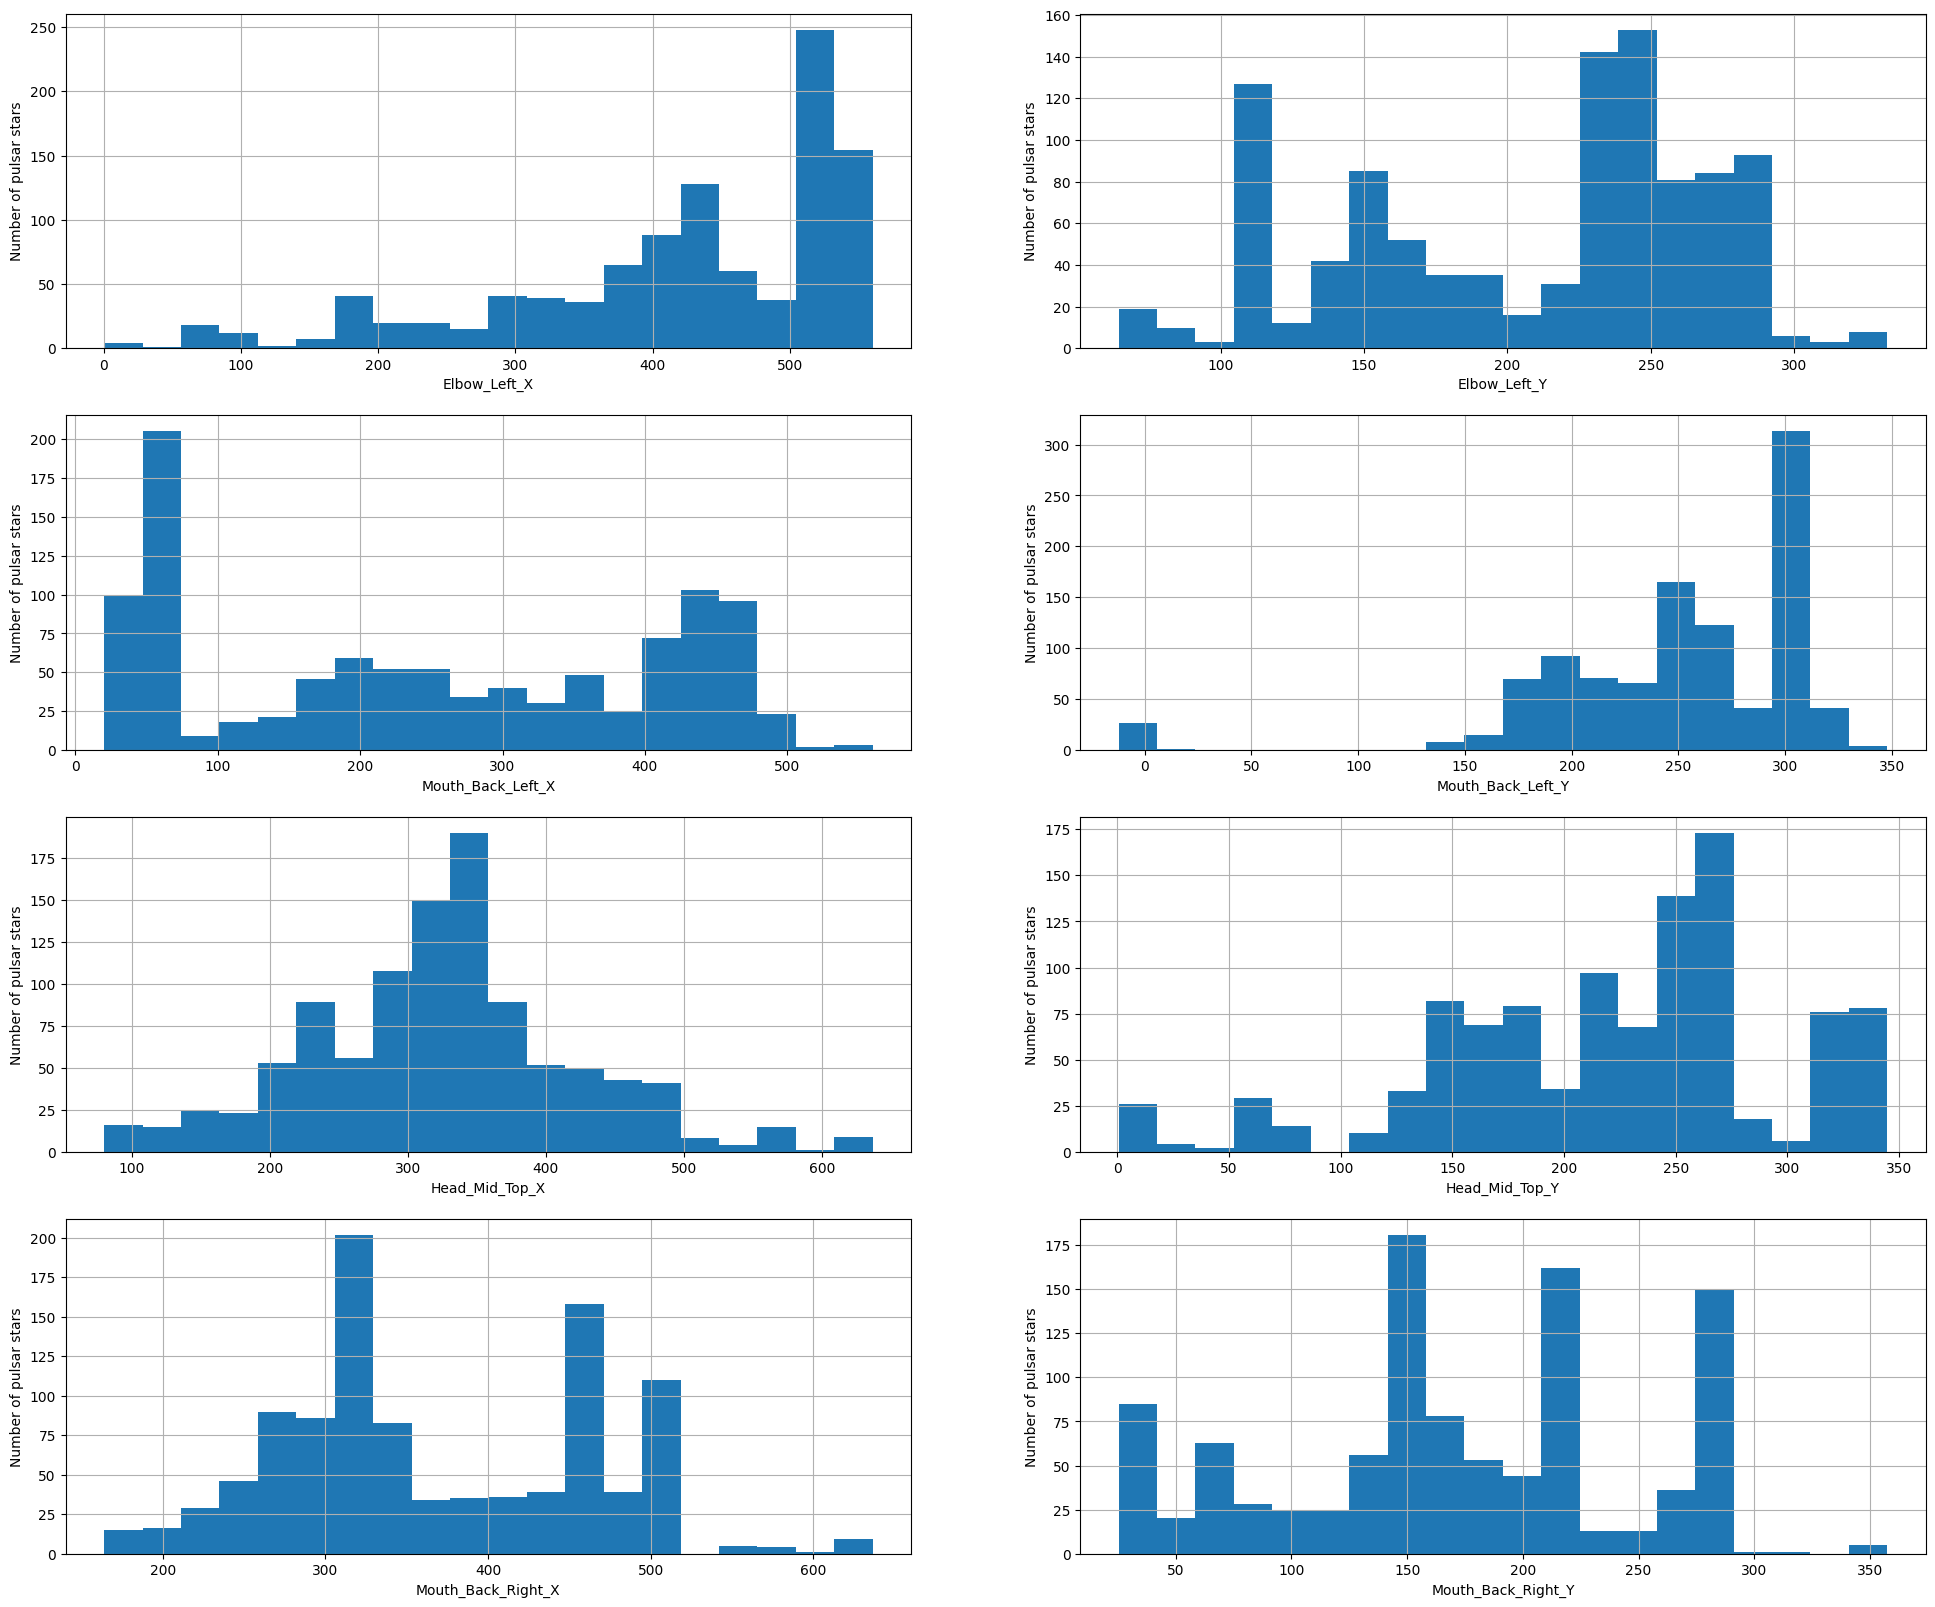

In [ ]:
# plot histogram to check distribution
plt.figure(figsize=(24,20))

for i in range(0,8):
  plt.subplot(4, 2, i+1)
  fig = df[df.columns[i]].hist(bins=20)
  fig.set_xlabel(df.columns[i])
  fig.set_ylabel('Number of pulsar stars')


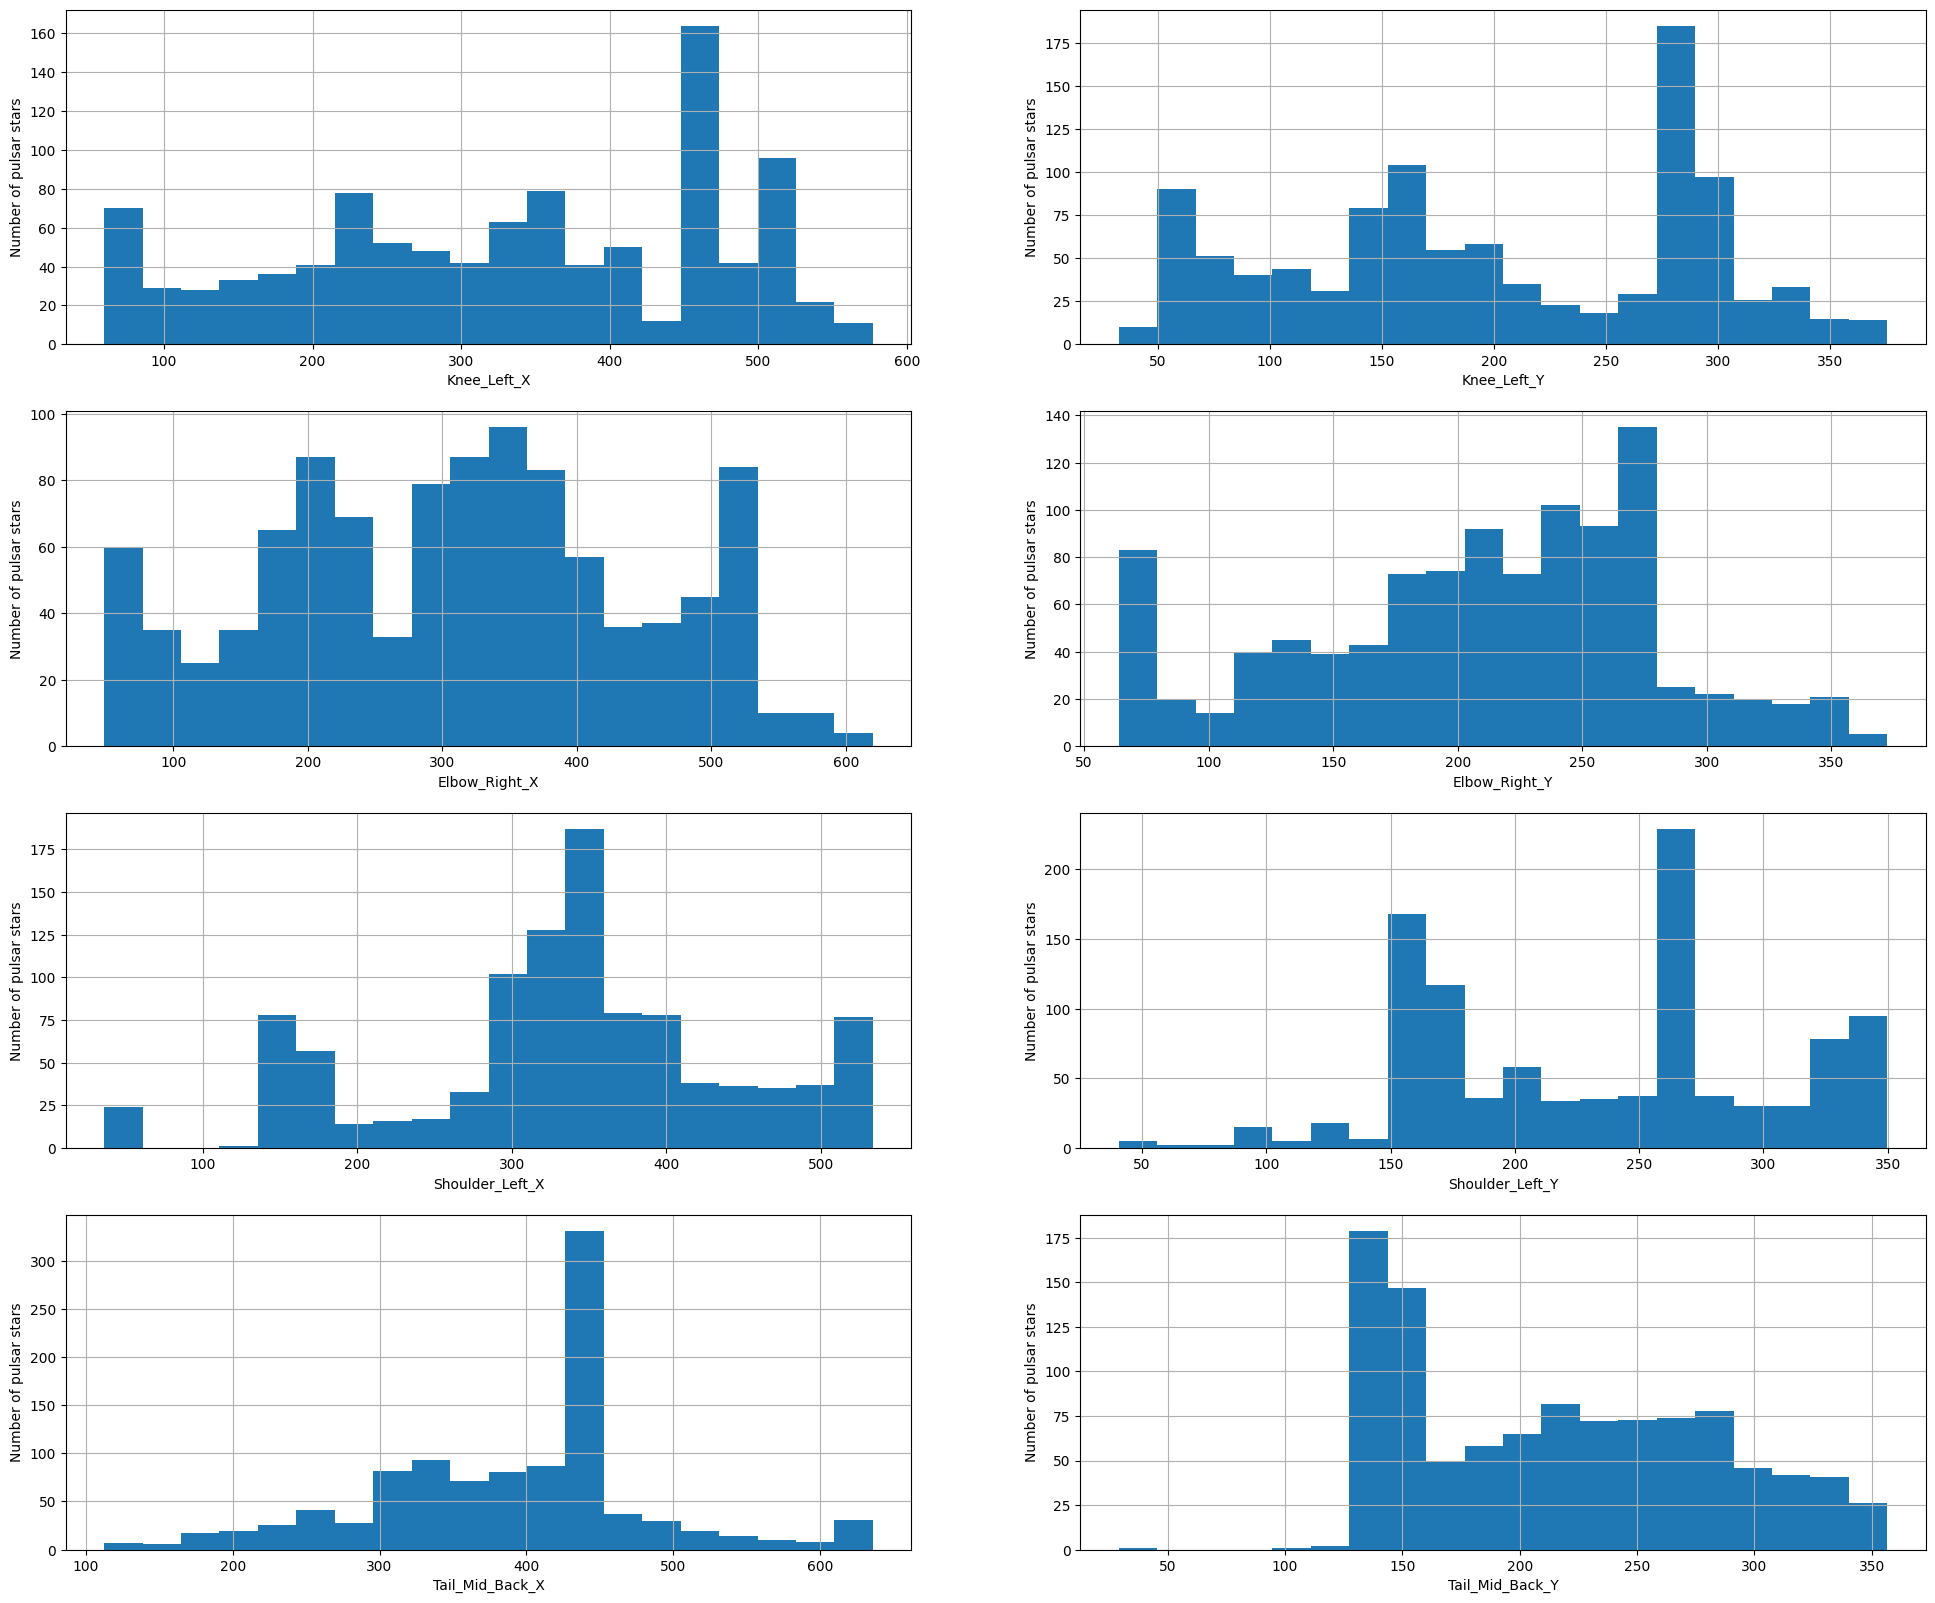

In [ ]:
# plot histogram to check distribution
plt.figure(figsize=(24,20))
j=1
for i in range(8,16):
  plt.subplot(4, 2, j)
  fig = df[df.columns[i]].hist(bins=20)
  fig.set_xlabel(df.columns[i])
  fig.set_ylabel('Number of pulsar stars')
  j+=1


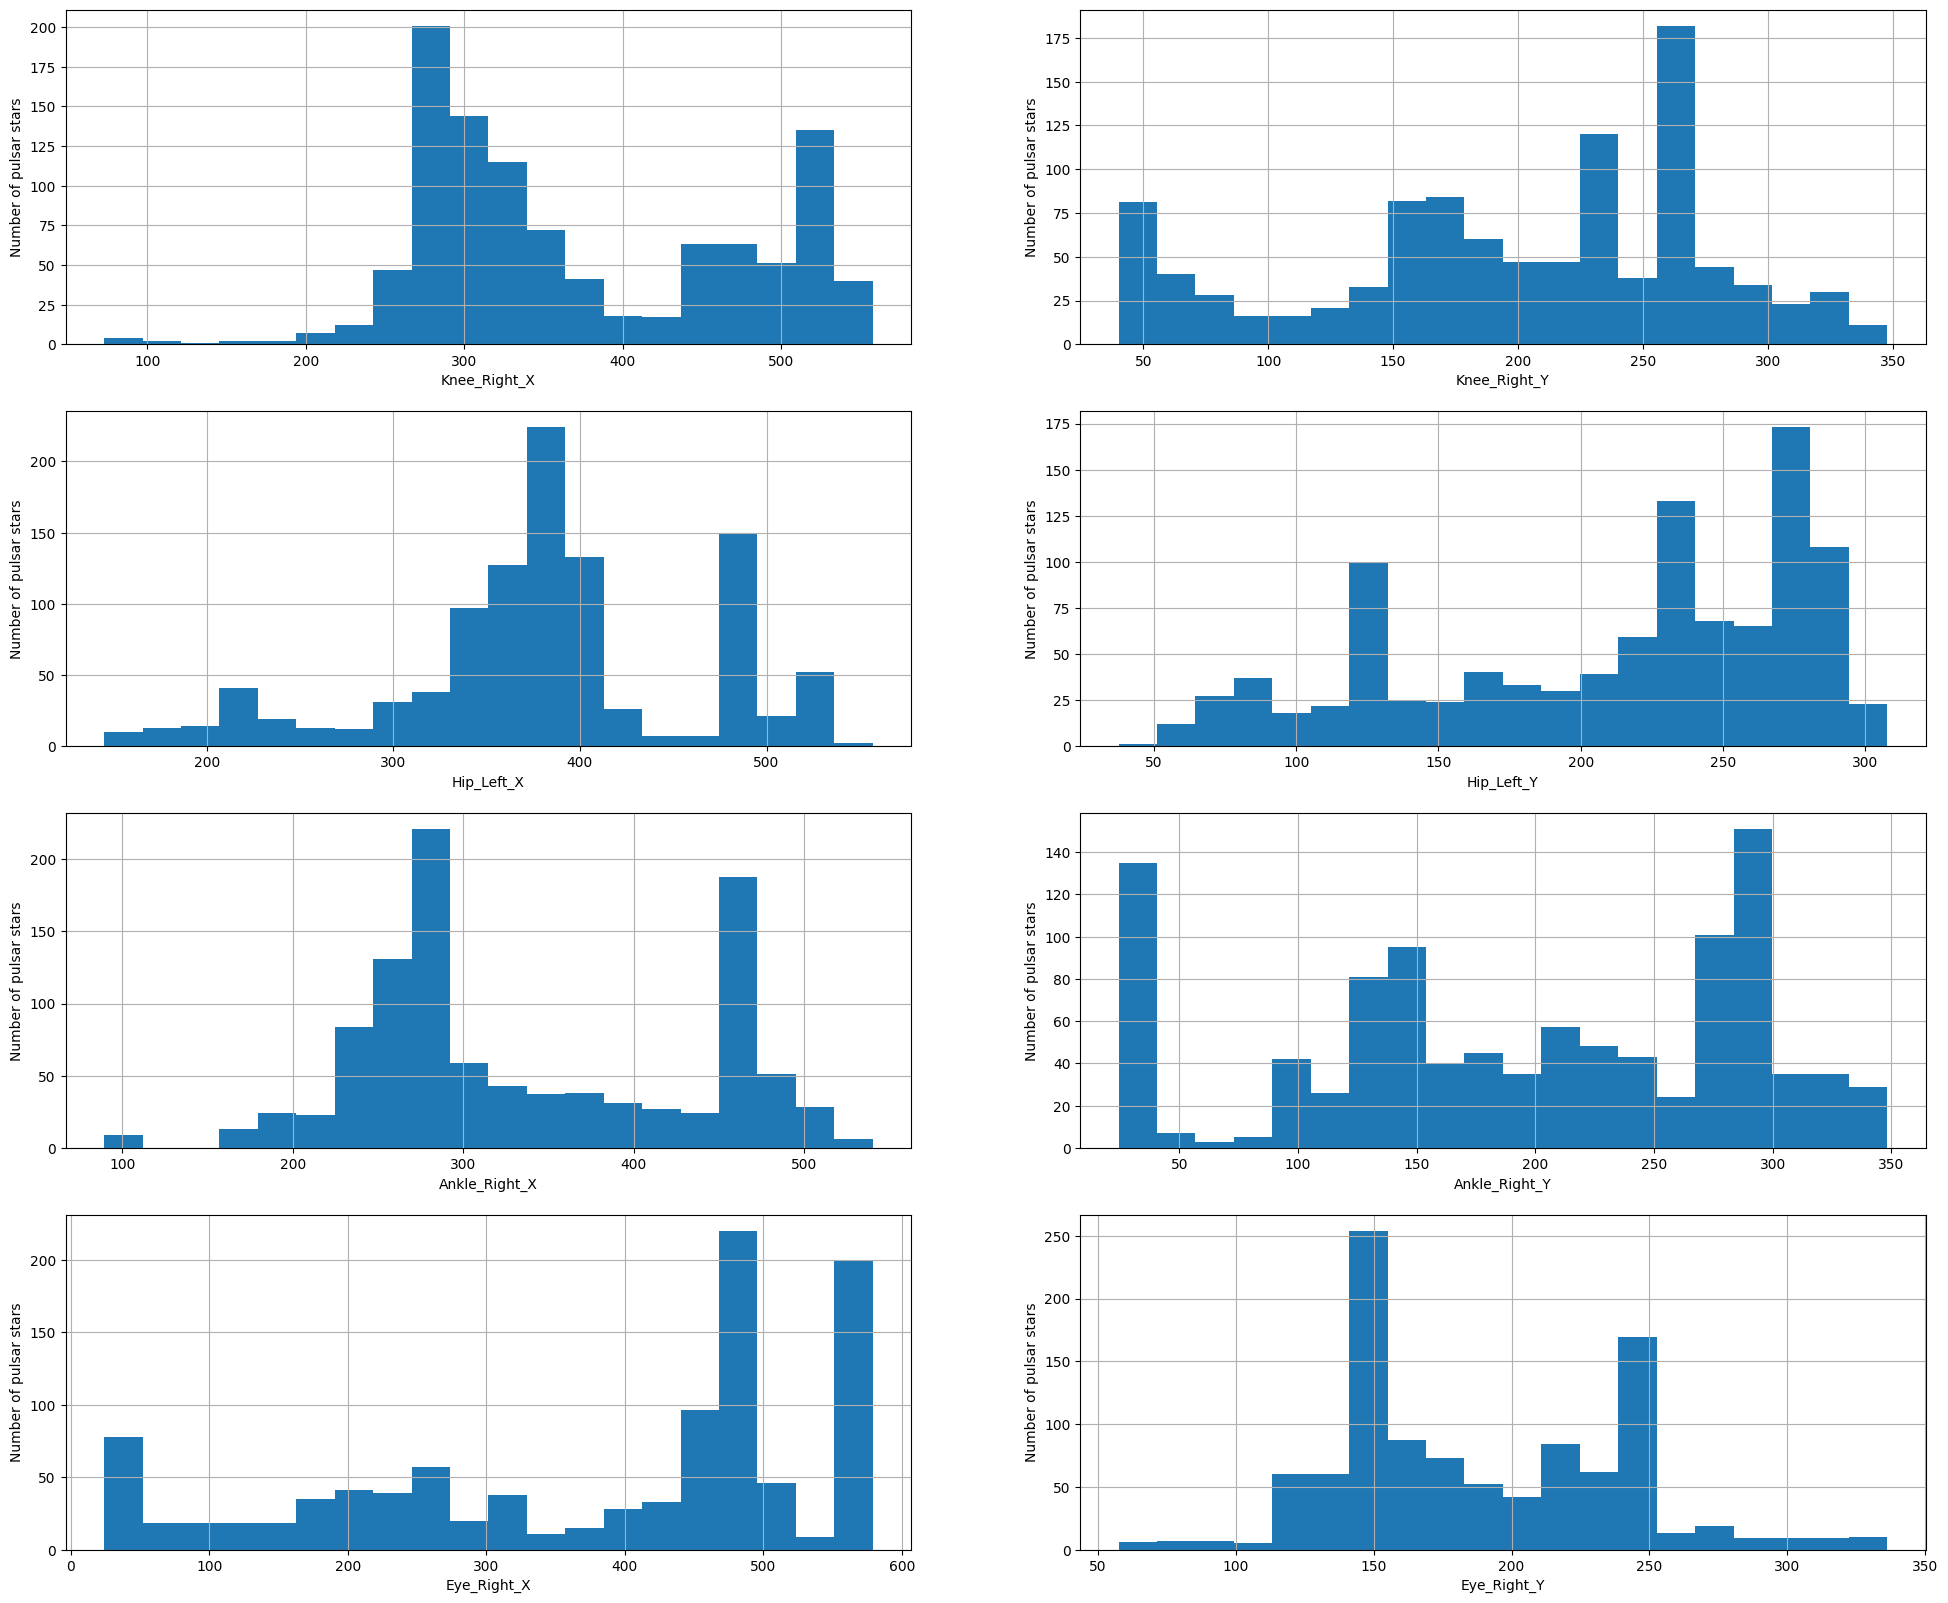

In [ ]:
# plot histogram to check distribution
plt.figure(figsize=(24,20))
j=1
for i in range(16,24):
  plt.subplot(4, 2, j)
  fig = df[df.columns[i]].hist(bins=20)
  fig.set_xlabel(df.columns[i])
  fig.set_ylabel('Number of pulsar stars')
  j+=1


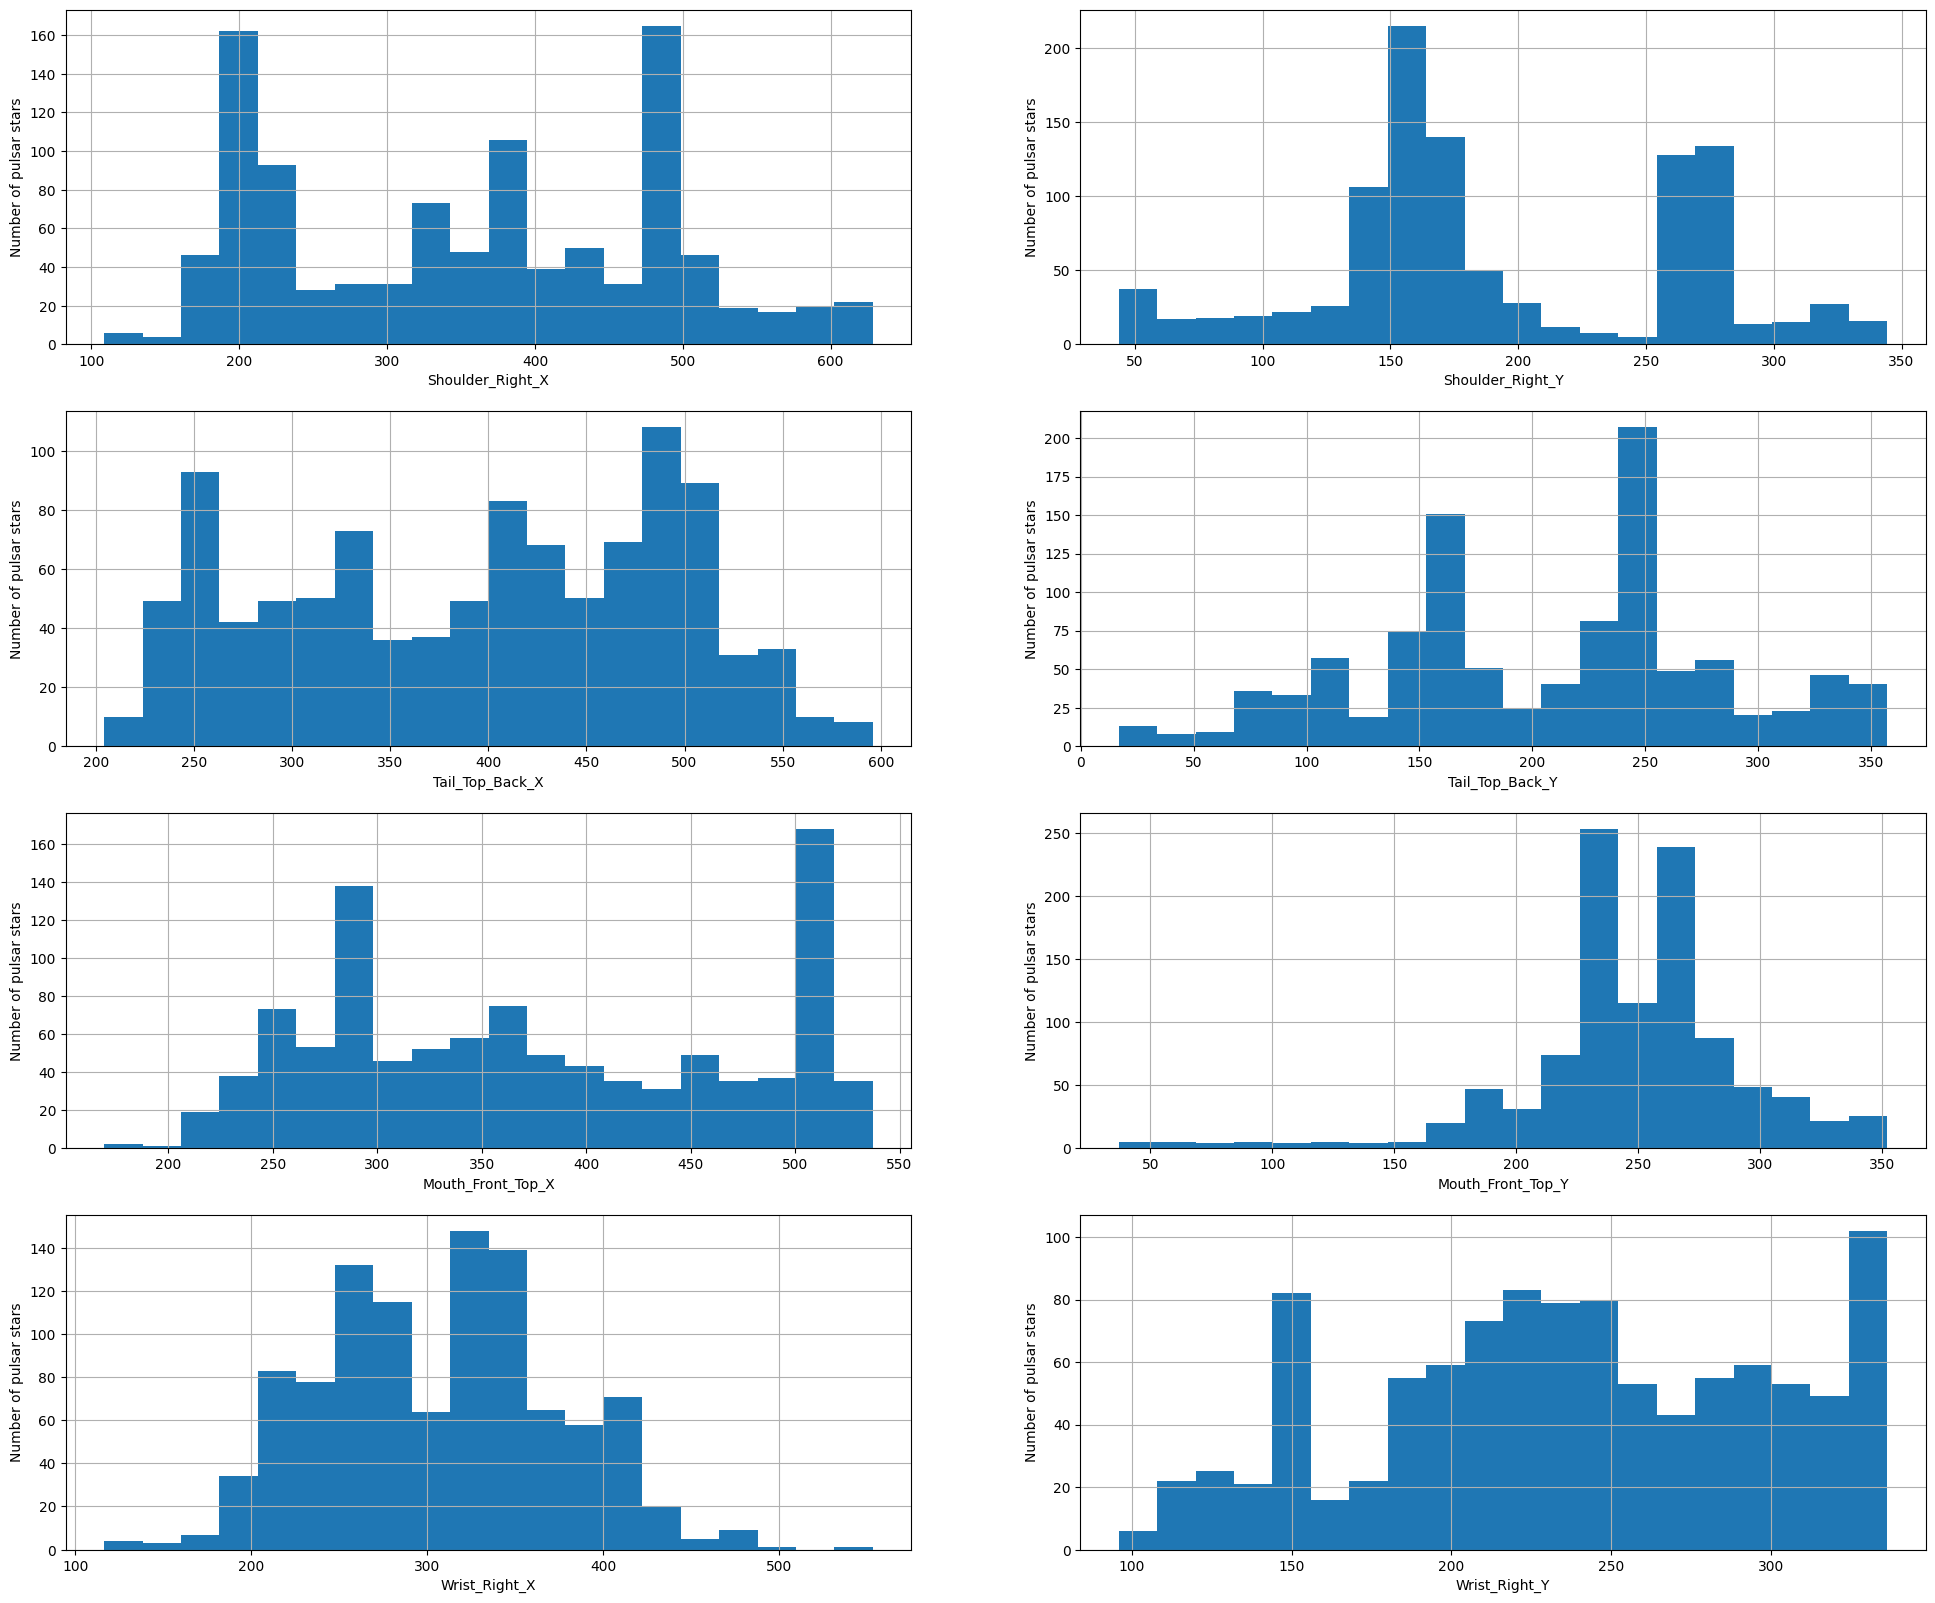

In [ ]:
# plot histogram to check distribution
plt.figure(figsize=(24,20))
j=1
for i in range(24,32):
  plt.subplot(4, 2, j)
  fig = df[df.columns[i]].hist(bins=20)
  fig.set_xlabel(df.columns[i])
  fig.set_ylabel('Number of pulsar stars')
  j+=1


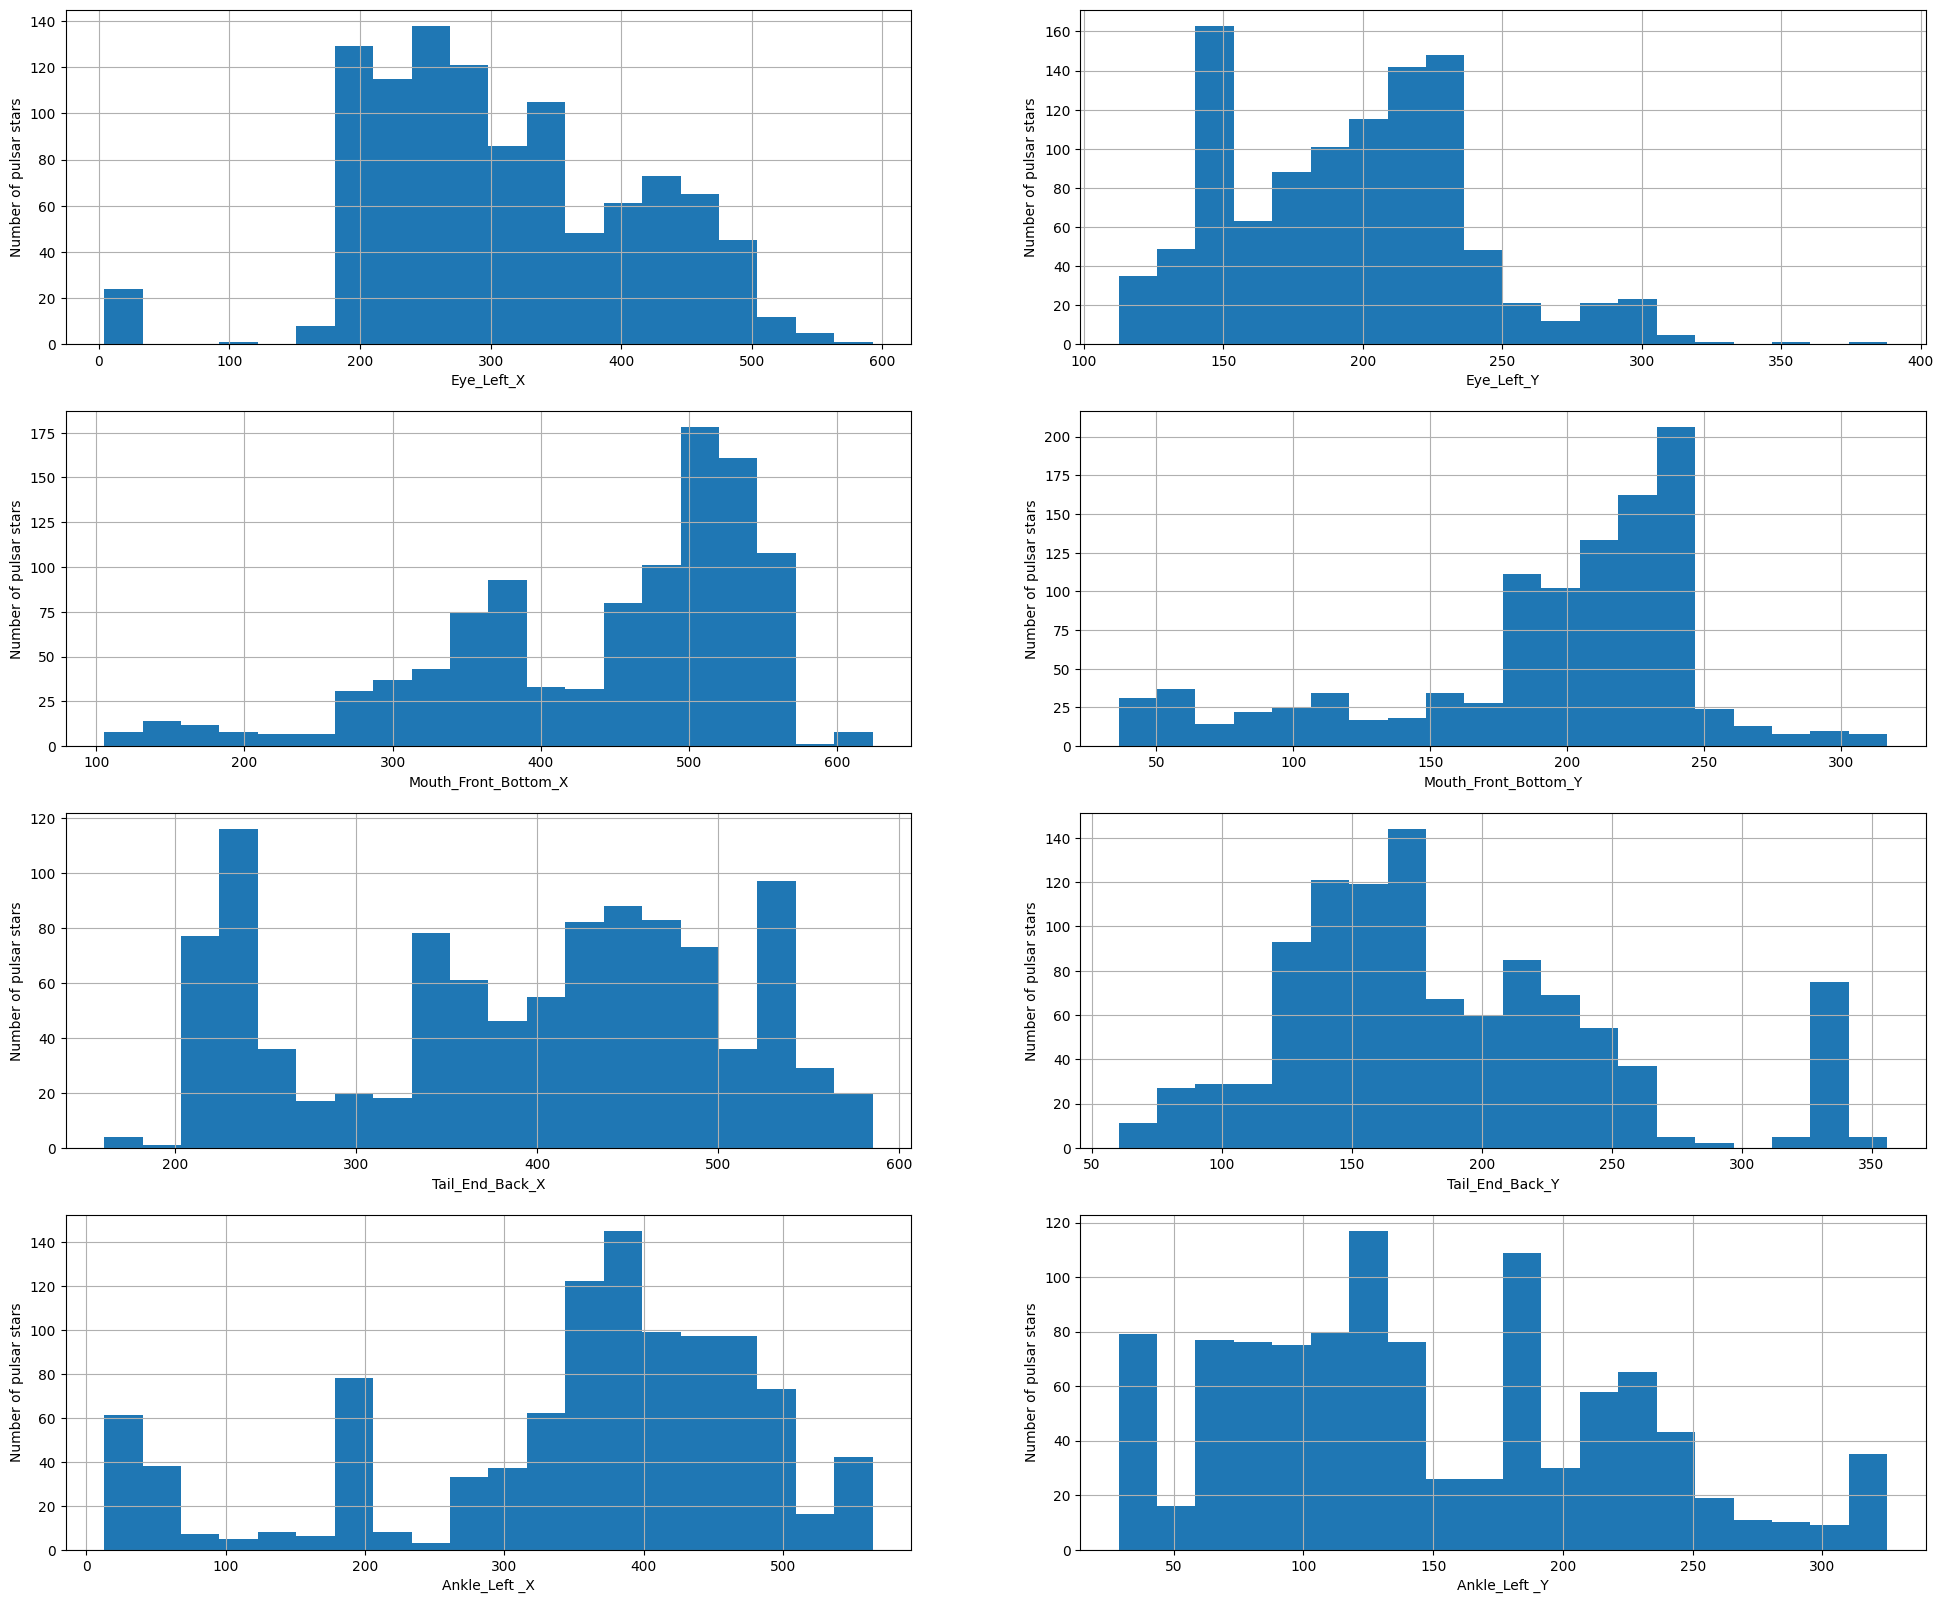

In [ ]:
# plot histogram to check distribution
plt.figure(figsize=(24,20))
j=1
for i in range(32,40):
  plt.subplot(4, 2, j)
  fig = df[df.columns[i]].hist(bins=20)
  fig.set_xlabel(df.columns[i])
  fig.set_ylabel('Number of pulsar stars')
  j+=1


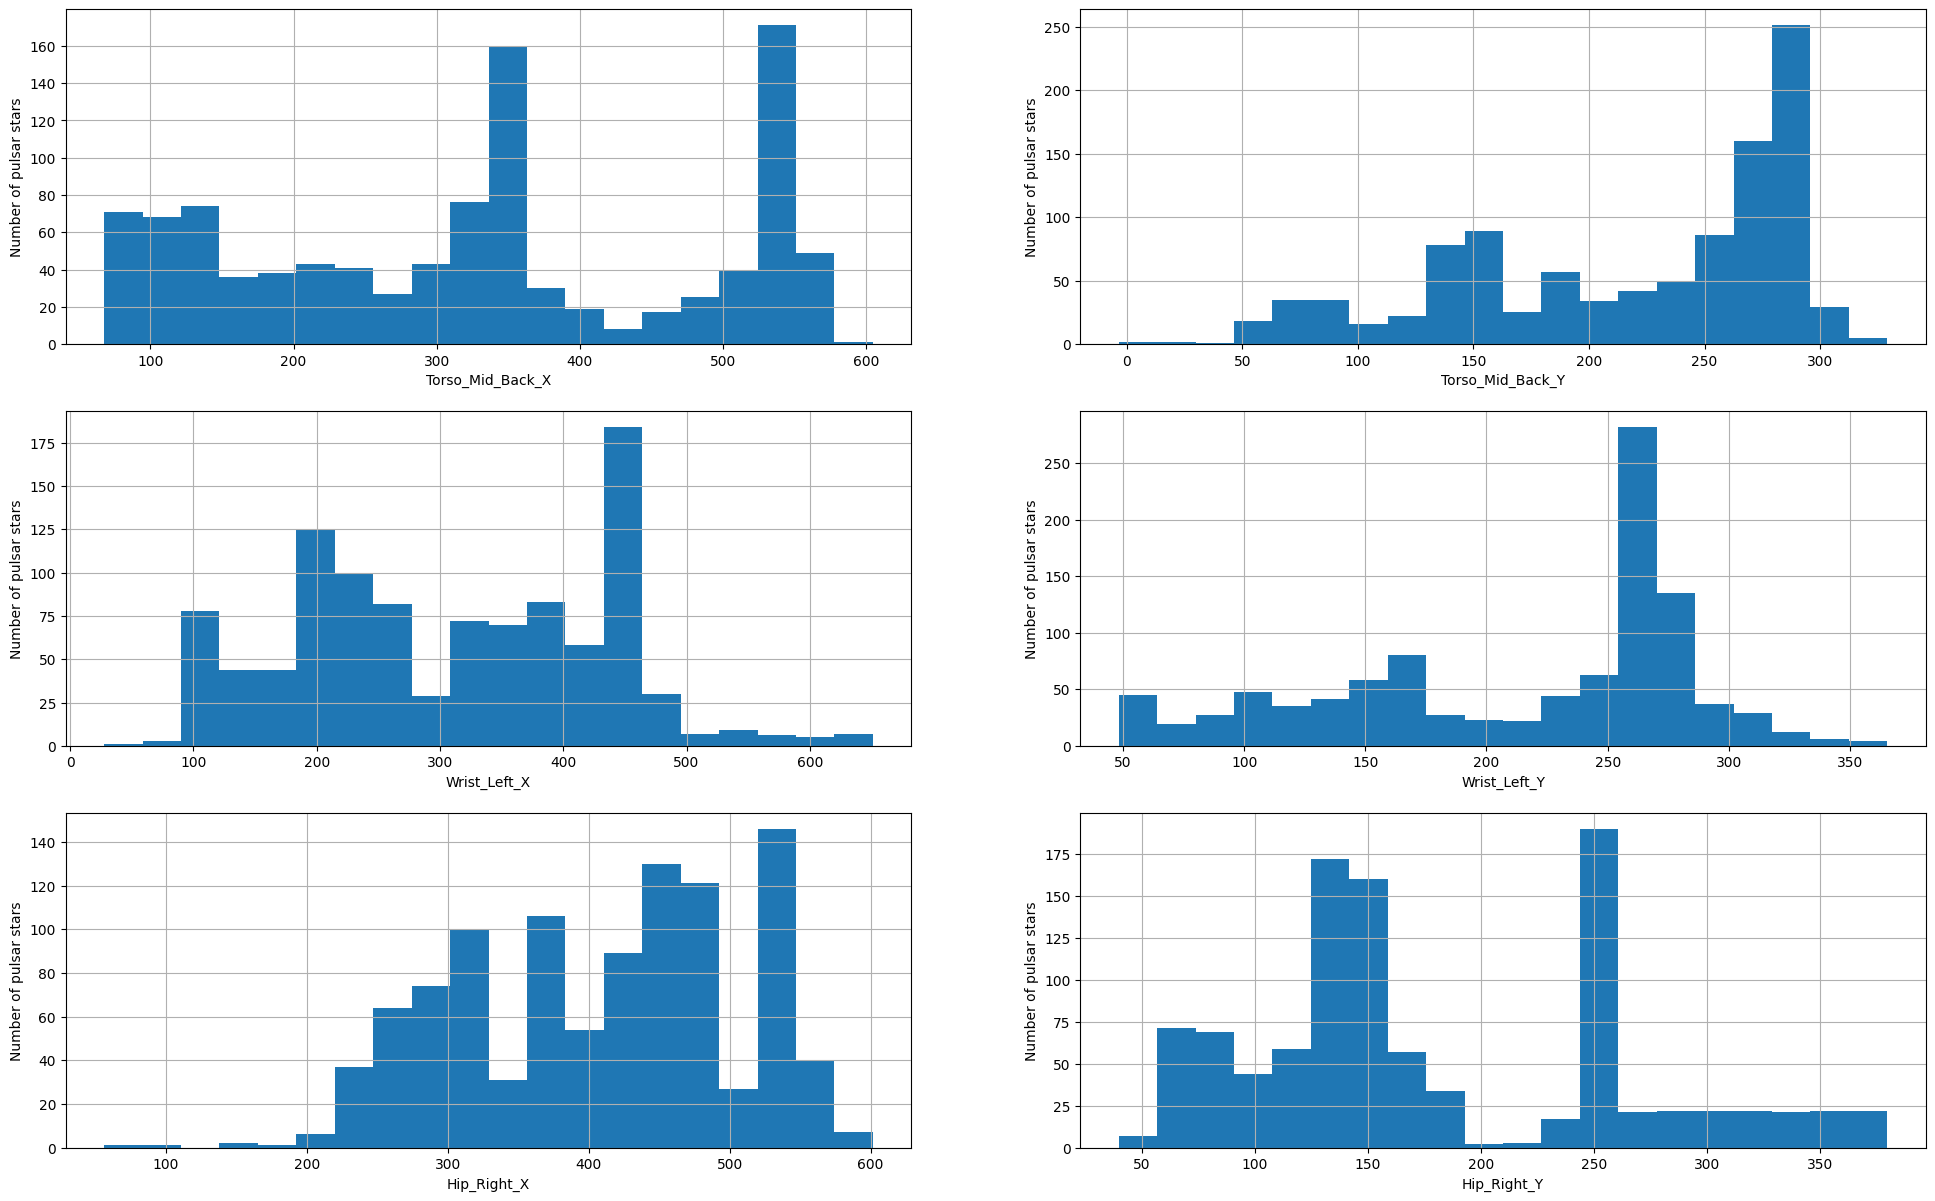

In [ ]:
# plot histogram to check distribution
plt.figure(figsize=(24,20))
j=1
for i in range(40,46):
  plt.subplot(4, 2, j)
  fig = df[df.columns[i]].hist(bins=20)
  fig.set_xlabel(df.columns[i])
  fig.set_ylabel('Number of pulsar stars')
  j+=1


In [12]:
Classes=[]
for i in range(48,193):
  Classes.append(df.columns[i])

Classes

['AC0',
 'AC1',
 'AC2',
 'AC3',
 'AC4',
 'AC5',
 'AC6',
 'AC7',
 'AC8',
 'AC9',
 'AC10',
 'AC11',
 'AC12',
 'AC13',
 'AC14',
 'AC15',
 'AC16',
 'AC17',
 'AC18',
 'AC19',
 'AC20',
 'AC21',
 'AC22',
 'AC23',
 'AC24',
 'AC25',
 'AC26',
 'AC27',
 'AC28',
 'AC29',
 'AC30',
 'AC31',
 'AC32',
 'AC33',
 'AC34',
 'AC35',
 'AC36',
 'AC37',
 'AC38',
 'AC39',
 'AC40',
 'AC41',
 'AC42',
 'AC43',
 'AC44',
 'AC45',
 'AC46',
 'AC47',
 'AC48',
 'AC49',
 'AC50',
 'AC51',
 'AC52',
 'AC53',
 'AC54',
 'AC55',
 'AC56',
 'AC57',
 'AC58',
 'AC59',
 'AC60',
 'AC61',
 'AC62',
 'AC63',
 'AC64',
 'AC65',
 'AC66',
 'AC67',
 'AC68',
 'AC69',
 'AC70',
 'AC71',
 'AC72',
 'AC73',
 'AC74',
 'AC75',
 'AC76',
 'AC77',
 'AC78',
 'AC79',
 'AC80',
 'AC81',
 'AC82',
 'AC83',
 'AC84',
 'AC85',
 'AC86',
 'AC87',
 'AC88',
 'AC89',
 'AC90',
 'AC91',
 'AC92',
 'AC93',
 'AC94',
 'AC95',
 'AC96',
 'AC97',
 'AC98',
 'AC99',
 'AC100',
 'AC101',
 'AC102',
 'AC103',
 'AC104',
 'AC105',
 'AC106',
 'AC107',
 'AC108',
 'AC109',
 'AC110',


In [ ]:
X=df.iloc[:,:-145]
y=df[['AC133']]

In [ ]:
X

,Elbow_Left_X,Elbow_Left_Y,Mouth_Back_Left_X,Mouth_Back_Left_Y,Head_Mid_Top_X,Head_Mid_Top_Y,Mouth_Back_Right_X,Mouth_Back_Right_Y,Knee_Left_X,Knee_Left_Y,...,Tail_End_Back_X,Tail_End_Back_Y,Ankle_Left _X,Ankle_Left _Y,Torso_Mid_Back_X,Torso_Mid_Back_Y,Wrist_Left_X,Wrist_Left_Y,Hip_Right_X,Hip_Right_Y
0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0,552.346558,197.129211,...,-1.000000,-1.000000,564.281006,221.618042,405.100738,90.036453,-1.000000,-1.00000,413.137329,88.146378
1,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0,552.168823,197.092895,...,-1.000000,-1.000000,560.907593,220.193634,405.126221,89.464828,-1.000000,-1.00000,409.586212,87.144913
2,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0,-1.000000,-1.000000,...,-1.000000,-1.000000,557.471008,220.740875,403.890869,90.095901,-1.000000,-1.00000,412.404358,88.234253
3,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0,-1.000000,-1.000000,...,-1.000000,-1.000000,556.078735,219.874069,400.810394,91.881516,-1.000000,-1.00000,411.996368,87.791702
4,-1.0,-1.0,-1.0,-1.0,557.099548,105.430542,-1.0,-1.0,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,396.623108,91.853989,-1.000000,-1.00000,408.733063,88.228653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0,-1.000000,-1.000000,...,519.727173,136.869751,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000
1033,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0,265.060608,184.269119,...,265.114166,175.492722,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000
1034,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000
1035,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,612.429321,344.14682,-1.000000,-1.000000


In [ ]:
y

,AC133
0,1
1,1
2,1
3,1
4,1
...,...
1032,0
1033,0
1034,0
1035,0


In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=101)

In [ ]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train.shape,X_test.shape

((829, 46), (208, 46))

In [ ]:
y_train.shape,y_test.shape

((829, 1), (208, 1))

In [ ]:
svc=SVC()
svc.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
print('Train Aaccuracy = {0}%'.format(np.round(svc.score(X_train,y_train)*100,2)))
print('Test Aaccuracy = {0}%'.format(np.round(svc.score(X_test,y_test)*100,2)))

Train Aaccuracy = 99.52%
Test Aaccuracy = 99.52%


In [ ]:
pre=svc.predict(X_test)

## Random Forest

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.datasets import make_multilabel_classification
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
data='/content/Tray164.csv'
df = pd.read_csv(data)
df

In [ ]:
df=df.fillna(value=-1)
df

In [ ]:
df.isnull().sum().sum()

In [ ]:
Classes=[]
for i in range(48,193):
  Classes.append(df.columns[i])

Classes

In [ ]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

In [ ]:
X=df.iloc[:,:-147]
y=df[Classes]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
forest = RandomForestClassifier(random_state=0)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=2)
multi_target_forest.fit(X_train, y_train)
per=multi_target_forest.predict(X_test)

In [ ]:
for p in per:
  print(p)

Streaming output truncated to the last 5000 lines.
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [ ]:
print('Train Accuracy = {0}%'.format(np.round(multi_target_forest.score(X_train,y_train)*100,2)))

print('Test Accuracy = {0}%'.format(np.round(multi_target_forest.score(X_test,y_test)*100,2)))

Train Accuracy = 99.86%
Test Accuracy = 83.35%


In [ ]:
data='/content/drive/MyDrive/COCOHorseSleapPose/Updata.csv'
df2 = pd.read_csv(data)

In [ ]:
df2.shape

(1037, 193)

In [ ]:
X_test2=df2.iloc[:,:-147]
X_test2.shape

(1037, 46)

In [ ]:
y_test2=df2[Classes]

In [ ]:
y_test2.shape

(1037, 145)

In [ ]:
X_test2=X_test2.fillna(value=-1)

In [ ]:
X_test2.isnull().sum().sum()

0

In [ ]:
pred2 = multi_target_forest.predict(X_test2)

In [ ]:
print('Test Accuracy = {0}%'.format(np.round(multi_target_forest.score(X_test2,y_test2)*100,2)))

Test Accuracy = 8.2%
